11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0952
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0295
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0195
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0144
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0112
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


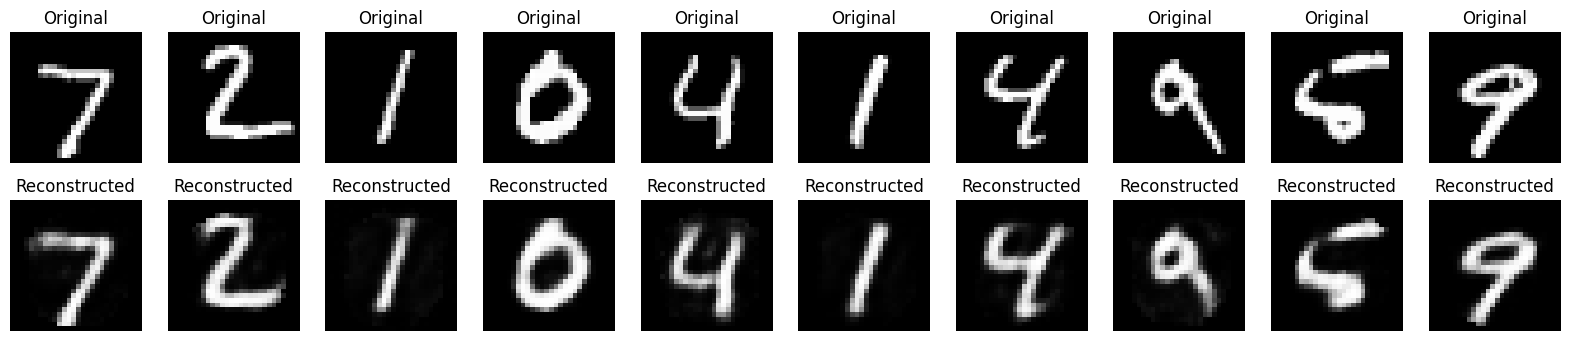

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train,_),(x_test,_) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.

x_train =x_train.reshape((x_train.shape[0],-1))
x_test=x_test.reshape((x_test.shape[0],-1))

input_dim =x_train.shape[1]
encoding_dim =64

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim,activation="relu")(input_layer)
decoder = Dense(input_dim,activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer,outputs=decoder)
autoencoder.compile(optimizer="adam",loss="mse")
autoencoder.fit(x_train,x_train,epochs=5,batch_size=256,shuffle=True,verbose=1)

reconstructed_images=autoencoder.predict(x_test[:10])
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.title('Original')
  plt.axis('off')

  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(reconstructed_images[i].reshape(28,28),cmap='gray')
  plt.title('Reconstructed')
  plt.axis('off')
plt.show()

In [8]:
!pip install yfinance

In [1]:
import yfinance as yf

# Get Apple (AAPL) stock data
ticker = yf.Ticker("AAPL")

# Fetch the latest historical data
data = ticker.history(period="1d")

# Print the last closing price
last_close = data['Close'].iloc[-1]
print(f"Last Closing Price of AAPL: ${last_close:.2f}")

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.